# Prediciting heart disease using machine learning

A Machine Learning project using Scikit-learn and Pandas to create a Machine Learning model for a binary classification problem.

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defintion
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Heart Disease

Original Data from the UCI Heart Disease Repository
http://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features

> Using 13 features to predict 1 target feature

### Data Dictionary

* age - Age of the patient in years
* sex - 
    * 1 - Male
    * 0 - Female
* cp - Chest Pain Type
     * typical angina
     * atypical angina
     * non-anginal
     * asymptomatic
* trestbps - Resting blood pressure(in mm Hg on admission to the hospital)
* chol - Serum cholesterol in mg/dl
* fbs - If Fasting Blood Sugar > 120 mg/dl
* restecg - Resting Electrocardiographic Results
    * normal
    * stt abnormality
    * lv hypertrophy
* thalach - Maximum Heart Rate Achieved
* exang - Exercise-induced Angina (True/False)
* oldpeak - ST depression induced by exercise relative to rest
* slope - The Slope of the Peak Exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopings: signs of unhealthy heart
* ca - Number of Major Sessels (0-3) colored by fluoroscopy
* thal
    * normal
    * fixed defect
    * reversible defect
* target - The Target Attribute

## Preparing the tools

We're going to use Pandas, Matplotlib, NumPy for data analysis and manipulation

In [52]:
# Import all the tools we need

# EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Plots to appear inside the notebook
%matplotlib inline 

# Models from Scitkit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, auc

## Load Data

In [53]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is find out more about the data and become a subject matter expert on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's the missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
# Let's find out how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

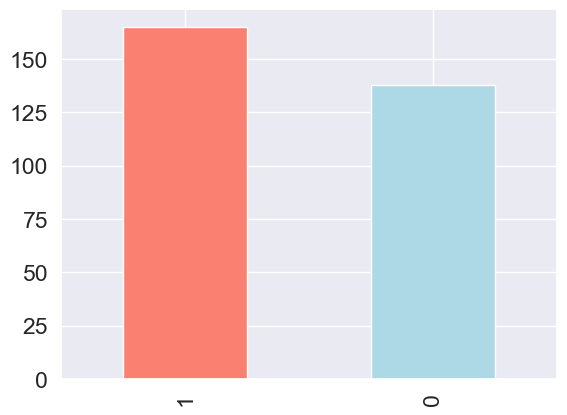

In [56]:
df['target'].value_counts().plot(kind="bar", color=['salmon','lightblue'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disase Frequency according to Sex

In [60]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [61]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


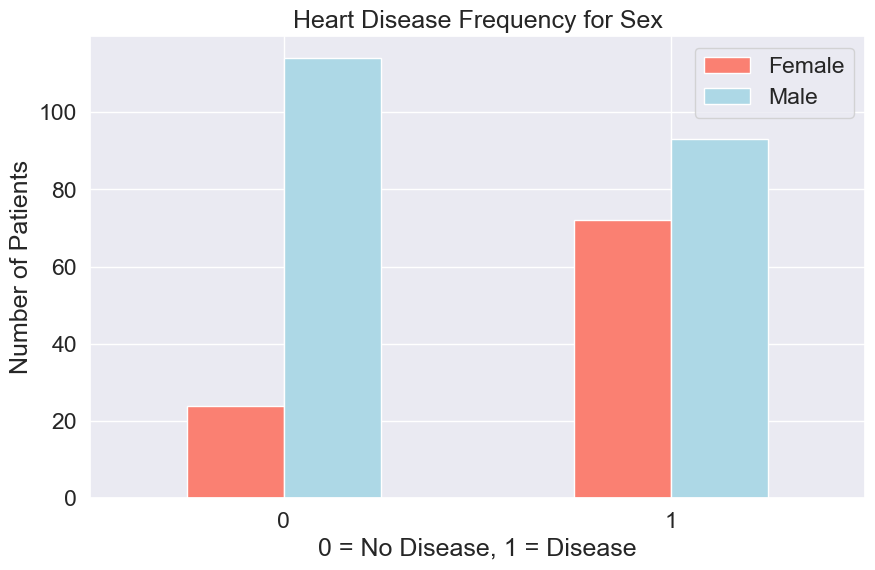

In [62]:
# Create a plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])

plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Number of Patients')
plt.title('Heart Disease Frequency for Sex')
plt.legend(labels=['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

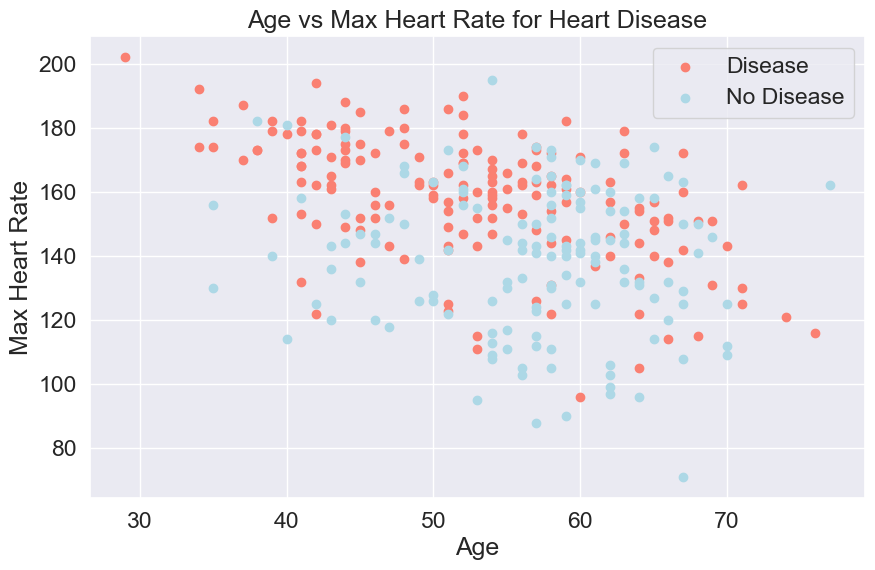

In [63]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')

# Scatter with positive examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color='lightblue')

plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Age vs Max Heart Rate for Heart Disease')
plt.legend(labels=['Disease','No Disease']);

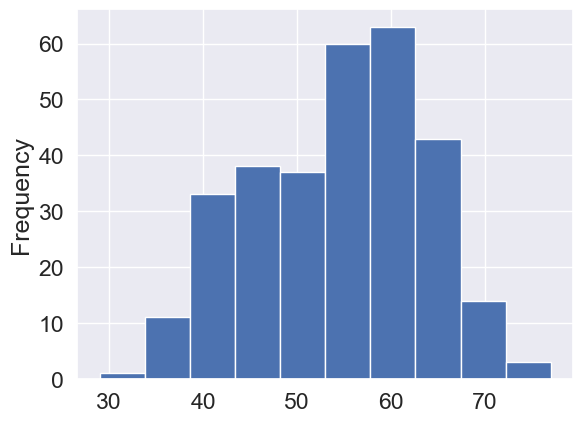

In [64]:
# Check the distribution of the age column with a histogram
df['age'].plot.hist();

### Heart Disease Frequency per Chest Pain Type

* cp - Chest Pain Type
     * 0 typical angina
     * 1 atypical angina
     * 2 non-anginal
     * 3 asymptomatic

In [65]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


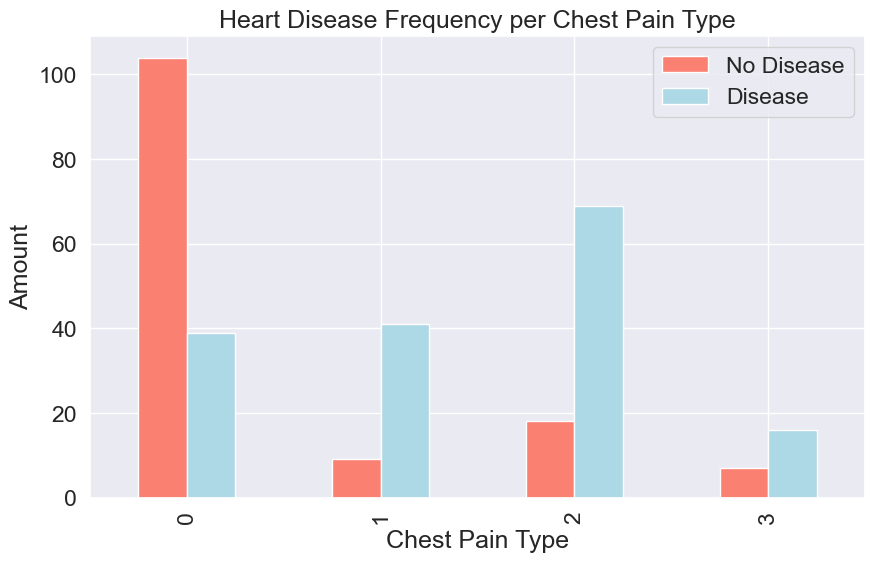

In [66]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease']);

In [67]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

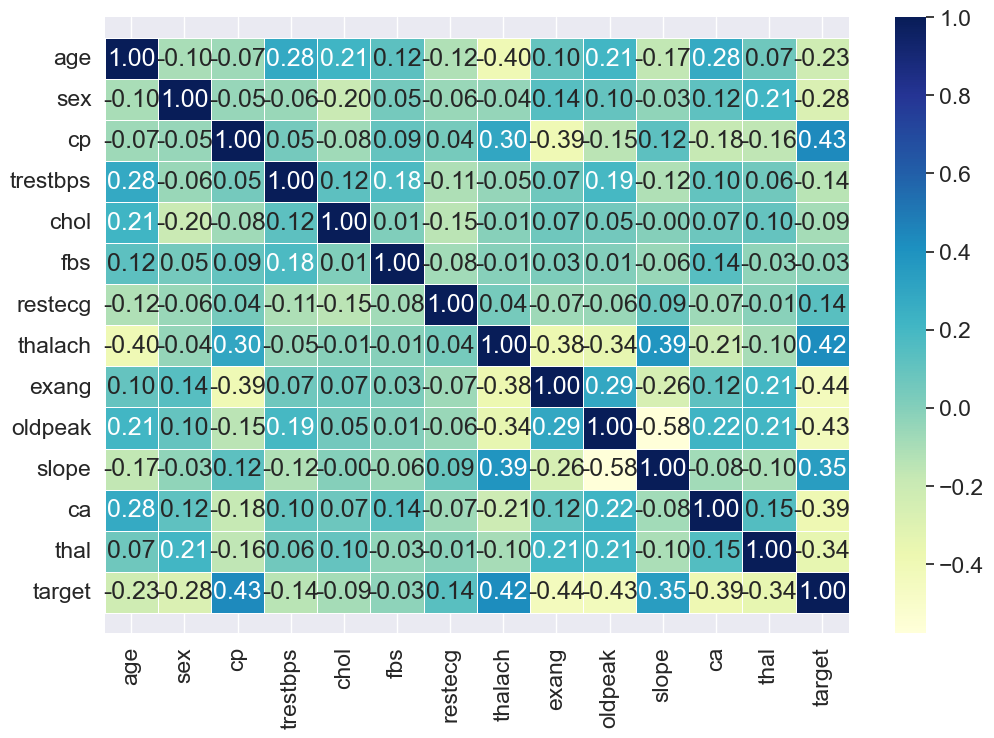

In [68]:
# Let's make our correlation matrix a little prettier

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [69]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
# Split date into X and y
X = df.drop("target", axis=1)
y= df['target']

In [71]:
# Split into train and test split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [72]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


Now we've got our data split into traing and test sets, it's time to train our model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifiers
3. Random Forest Classifier

In [73]:
# Put models in a dictionary

models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models: a dict of different Scikit-Learn models
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    models_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and apped its score the model_scores
        models_scores[name] = model.score(X_test, y_test)
    return models_scores

In [74]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\ProgramData\miniconda3\envs\learning-environment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

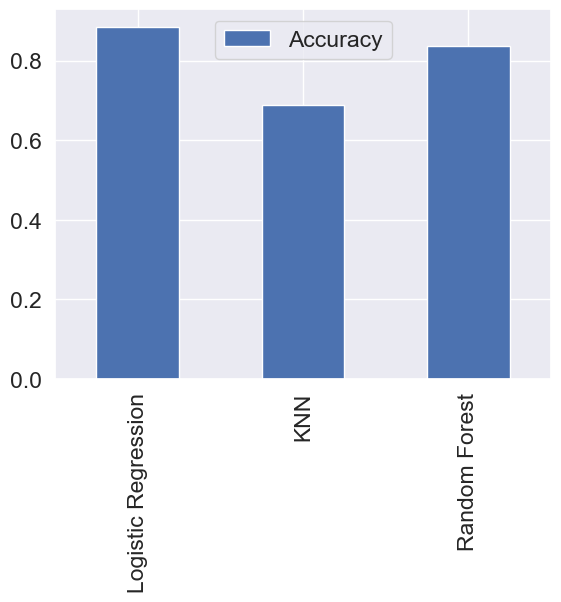

In [76]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

model_compare.T.plot.bar();

Now we've got some baseline models, let's try to fine tune them.

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-valiation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [77]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Set up KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbor
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


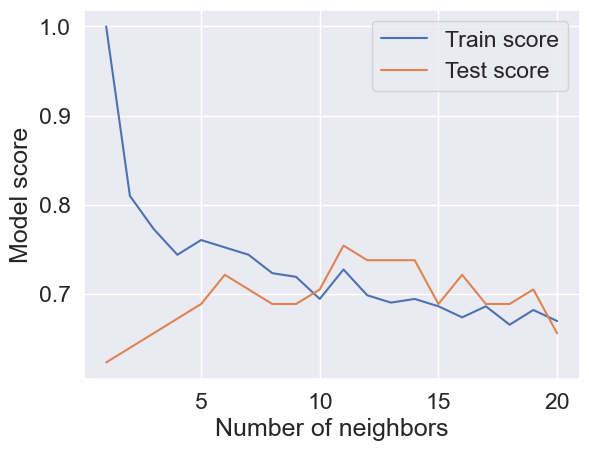

In [78]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifer()

...using RandomizedSearchCV

In [79]:
np.random.seed(42)

logreg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [80]:
np.random.seed(42)

random_search_logreg = RandomizedSearchCV(LogisticRegression(),
                                          param_distributions=logreg_grid,
                                          cv = 5,
                                         n_iter=20,
                                         verbose=True)

random_search_logreg.fit(X_train, y_train)

print(random_search_logreg.best_params_)
print(random_search_logreg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'solver': 'liblinear', 'C': 0.23357214690901212}
0.8852459016393442


In [81]:
np.random.seed(42)

random_search_rf = RandomizedSearchCV(RandomForestClassifier(),
                                     param_distributions=rf_grid,
                                     cv = 5,
                                     n_iter=20,
                                     verbose=True)

random_search_rf.fit(X_train, y_train)

print(random_search_rf.best_params_)
print(random_search_rf.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'n_estimators': 210, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_depth': 3}
0.8688524590163934


### Hyperparameter tuning with GridSearchCV

Since LogisticRegression provides the best scores so far, we focus further on it using GridSearchCV()

In [82]:
np.random.seed(42)

logreg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"],
                "max_iter": [1000,5000,10000]}

# Setup grid hyperparameter search for LogisticRegression

grid_search_logreg = GridSearchCV(LogisticRegression(),
                                 param_grid=logreg_grid,
                                 cv =5,
                                 verbose=True)

# Fit the model

grid_search_logreg.fit(X_train, y_train)

print(grid_search_logreg.best_params_)
print(grid_search_logreg.score(X_test, y_test))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
{'C': 0.20433597178569418, 'max_iter': 1000, 'solver': 'liblinear'}
0.8852459016393442


## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

... and it would be great if cross-validation was used where possible.

To make comparisons and evalute our trained model, first we need to make predictions.

In [83]:
# Make predictions with the tuned model

y_preds = grid_search_logreg.predict(X_test)

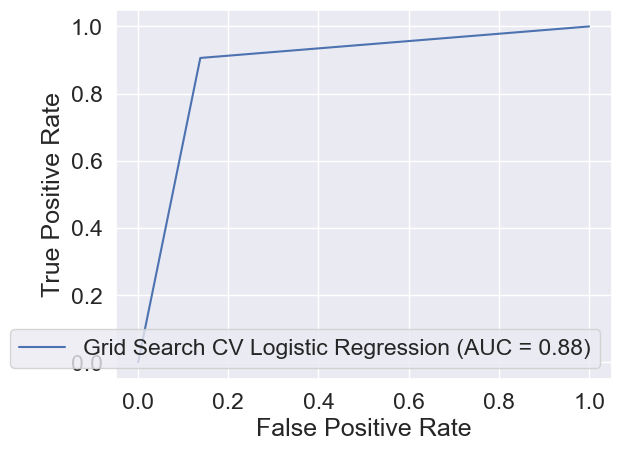

In [84]:
# Plot ROC curve and calculate AUC 

fpr, tpr, thresholds = roc_curve(y_test, y_preds)

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Grid Search CV Logistic Regression')

display.plot();

In [85]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


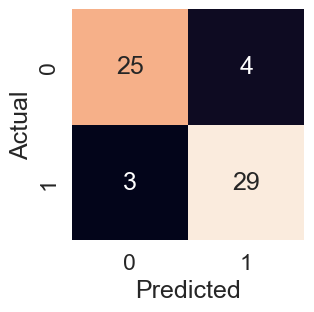

In [86]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a  nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC Curve, an AUC metric and a confusion matrix.
Let's get a classification report as well as a cross-valiated precision, recall and f1 score.

In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation using cross-validation

In [88]:
# Check best hyperparameters

grid_search_logreg.best_params_

{'C': 0.20433597178569418, 'max_iter': 1000, 'solver': 'liblinear'}

In [89]:
# Create a new classifier with best pararams

clf = LogisticRegression(C=0.20433597178569418,
                         max_iter=1000,
                         solver='liblinear')

# Cross-validated accuracy
cv_accuracy = cross_val_score(clf, X, y, scoring='accuracy')

# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, scoring='precision')

# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, scoring='recall')

# Cross-validated f1
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
               

In [90]:
cv_accuracy = np.mean(cv_accuracy)

cv_precision = np.mean(cv_precision)
    
cv_recall = np.mean(cv_recall)

cv_f1 = np.mean(cv_f1)

In [91]:
# Visualise our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


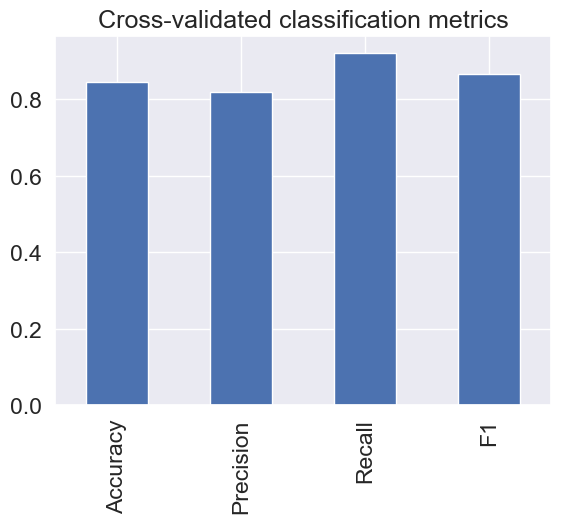

In [92]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcome of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our LogisticRegression model.

In [93]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C=0.20433597178569418,
                         max_iter=1000,
                         solver='liblinear')

clf.fit(X_train, y_train);

In [94]:
# Check coef
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [95]:
# Match coef's features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [96]:
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

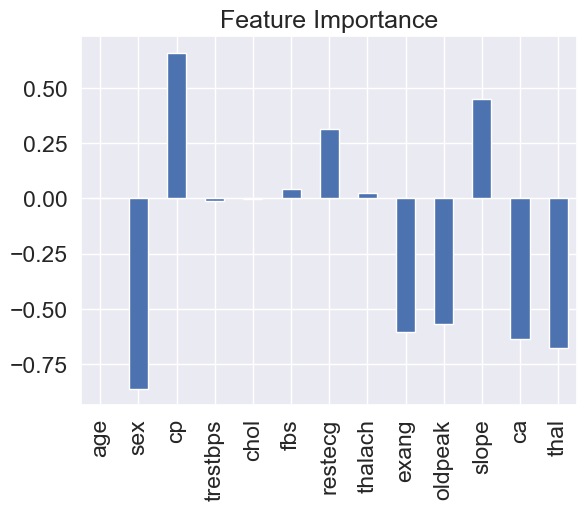

In [97]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [98]:
pd.crosstab(df["sex"], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [99]:
pd.crosstab(df["slope"], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models?

If you have hit you metric

* If you model is good enough, how would you exort it and share it with others?